In [1]:
pip install nest_asyncio


In [2]:
pip install transformers

In [3]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 6.0 MB/s eta 0:00:00


In [5]:
pip install diffusers transformers torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

#Imports and Model Initialization

In [6]:
import cv2
import numpy as np
from PIL import Image
import asyncio
import praw
import nest_asyncio
from transformers import pipeline, GPT2LMHeadModel, GPT2Tokenizer
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt
import random

# Load the Stable Diffusion model
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id)
pipe.to("cuda")

# Apply the nest_asyncio patch to allow nested event loops
nest_asyncio.apply()

# Initialize Reddit API with your credentials
reddit = praw.Reddit(
    client_id="fg83zOqGyRSMrWjtLz8MWQ",
    client_secret="h9ha7abj4V4dR8fPWIWcqvImH9za3Q",
    user_agent="your_user_agent",
)

# Initialize GPT-2 model and tokenizer from Hugging Face
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Initialize sentiment analysis pipeline
emotion_analyzer = pipeline("sentiment-analysis")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


#Data Fetching and Text Refinement Functions

In [7]:
# Function to fetch Reddit data asynchronously
async def fetch_reddit_data(subreddit_name, keyword, limit=10):
    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.search(keyword, limit=limit)
    reddit_data = ""
    for post in posts:
        reddit_data += f"Title: {post.title}\n"
        reddit_data += f"Content: {post.selftext}\n\n"
    return reddit_data

# Function to refine text using GPT-2
def refine_text_with_gpt2(text):
    inputs = tokenizer.encode(text, return_tensors="pt")
    outputs = model.generate(inputs, max_length=500, num_return_sequences=1, no_repeat_ngram_size=2, early_stopping=True)
    refined_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return refined_text

# Function to remove question marks from text
def remove_question_marks(text):
    return text.replace("?", "")


#Insight Extraction and Persona Text Generation

In [8]:
# Function to extract demographics and refine text
async def extract_and_refine_insights(reddit_data):
    lines = reddit_data.split('\n')
    demographics = []
    emotions = []
    ratings = []

    for line in lines:
        if "age" in line.lower() or "years old" in line.lower():
            demographics.append(line)

        if line:
            emotion = emotion_analyzer(line)
            emotions.append(emotion[0]['label'])

        if "recommend" in line.lower() or "like" in line.lower() or "dislike" in line.lower():
            ratings.append(line)

    demographics_text = "\n".join(demographics)
    emotions_text = "\n".join(emotions)
    ratings_text = "\n".join(ratings)

    # Use GPT-2 to humanize and improve text
    refined_demographics = refine_text_with_gpt2(demographics_text)
    refined_emotions = refine_text_with_gpt2(emotions_text)
    refined_ratings = refine_text_with_gpt2(ratings_text)

    # Remove question marks from the refined text
    refined_demographics = remove_question_marks(refined_demographics)
    refined_emotions = remove_question_marks(refined_emotions)
    refined_ratings = remove_question_marks(refined_ratings)

    return refined_demographics, refined_emotions, refined_ratings

async def generate_persona_text():
    subreddit_name = "ecommerce"
    keyword = "customer experience"

    # Fetch and process Reddit data
    reddit_data = await fetch_reddit_data(subreddit_name, keyword)

    # Extract and refine insights from the collected Reddit data
    demographics, emotions, ratings = await extract_and_refine_insights(reddit_data)

    # Format the user persona text
    persona_text = (
        "## User Persona\n\n"
        "### Basic Information\n\n"
        "Name: Sample User\n"
        "Age: 25\n"
        "Gender: Male\n"
        "Location: India\n\n"
        "### Demographics\n\n"
        f"{demographics}\n\n"
        "### Emotions\n\n"
        f"{emotions}\n\n"
        "### Ratings/Opinions\n\n"
        f"{ratings}\n"
    )

    return persona_text


#Image Creation and Canvas Overlay

In [9]:
# Function to create an image with the persona details
def create_persona_image(text_prompt):
    # Generate an image with the Stable Diffusion model
    negative_prompt = "No text, no blur, avoid unnatural colors, exclude any background elements."
    image = pipe(text_prompt, guidance_scale=10.0, negative_prompt=negative_prompt).images[0]

    # Convert the image to an OpenCV-compatible format
    image_cv2 = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    return image_cv2

# Function to create a canvas and overlay text
def create_canvas_with_text(image, persona_text):
    # Define the dimensions for the canvas (larger to accommodate text)
    height, width, _ = image.shape
    canvas_height = height + 600  # Extra space for text
    canvas_width = width
    canvas = np.ones((canvas_height, canvas_width, 3), dtype=np.uint8) * 255  # White canvas

    # Place the image on the canvas
    canvas[0:height, 0:width] = image

    # Draw random rectangles and squares on the canvas
    num_shapes = 10  # Number of shapes to draw
    for _ in range(num_shapes):
        # Random position and size for the rectangle
        x1, y1 = random.randint(0, width - 100), random.randint(height, canvas_height - 100)
        x2, y2 = x1 + random.randint(50, 150), y1 + random.randint(50, 150)

        # Random light color
        color = (random.randint(200, 255), random.randint(200, 255), random.randint(200, 255))

        # Draw the rectangle
        cv2.rectangle(canvas, (x1, y1), (x2, y2), color, -1)

    # Overlay text on the canvas
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_color = (0, 0, 0)  # Black color
    thickness = 1
    y0, dy = height + 50, 20  # Starting position for text

    for i, line in enumerate(persona_text.split('\n')):
        y = y0 + i * dy
        cv2.putText(canvas, line, (50, y), font, font_scale, font_color, thickness, lineType=cv2.LINE_AA)

    return canvas


#Main Execution

  0%|          | 0/50 [00:00<?, ?it/s]

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable resul

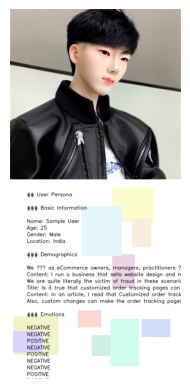

In [10]:
# Run the async function and create the image
async def main():
    text_prompt = (
        "A young Chinese male with a clear, detailed, and beautiful face, dark black eyes, "
        "urban and stylish appearance, high resolution, and photorealistic quality."
    )

    image = create_persona_image(text_prompt)
    persona_text = await generate_persona_text()

    # Create canvas with text and shapes overlay
    canvas_with_text = create_canvas_with_text(image, persona_text)

    # Save the canvas with text and shapes as an image
    output_image_path = "persona_image_with_text.png"
    cv2.imwrite(output_image_path, canvas_with_text)

    # Display the image with text and shapes
    plt.imshow(cv2.cvtColor(canvas_with_text, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Run the async function
await main()
